In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from plot_functions_TK import *

In [2]:
saving_file = "eigensolver_results"
if not os.path.exists(saving_file):
        os.makedirs(saving_file)

In [3]:
def egn_df(egn_modes_files):
    #Reads file egn_mode
    eigen_file = pd.read_fwf(egn_modes_files,col_name="values")
    res_modes = eigen_file.columns.values
    res_modes = int(res_modes[0])
    eigen_file.columns = ["values"]
    
    #Number of poloidal modes
    pol_modes = int(eigen_file["values"].values[0])
    new_eigen_file = eigen_file.drop(index=0)

    #Number of radial points
    num_rad = int(eigen_file["values"].values[1])
    new_eigen_file = new_eigen_file.drop(index=1).reset_index(drop=True)
    
    #Saves n and m modes
    m_modes, n_modes = [], []
    for i in range(pol_modes*2):
        if i%2 == 0:
            m_modes.append(int(new_eigen_file["values"].values[0]))
        if i%2 != 0:
            n_modes.append(int(new_eigen_file["values"].values[0]))

        new_eigen_file = new_eigen_file.drop(index=0).reset_index(drop=True)
    
    #Delets next values which correpond to the frequencies for the resonant modes
    eigen_func = new_eigen_file.iloc[res_modes:].reset_index(drop=True)
    
    #Obtaines radial values column
    radius = eigen_func.loc[:num_rad-1]
    radius.columns = ["r/a"]

    #creates new datasets
    new_eigen_func = eigen_func.iloc[num_rad:].reset_index(drop=True)
    df_val = eigen_func.iloc[num_rad:].reset_index(drop=True)
    
    for k in range(res_modes):
        modes = pd.DataFrame(columns = [f"{n_modes[i]}/{m_modes[i]}" for i in range(len(m_modes))])
        row = 0
        for i in range(num_rad):
            values = df_val.loc[:pol_modes-1]["values"].to_numpy()
            df_val = df_val.iloc[pol_modes:].reset_index(drop=True)
            modes.loc[row] = values
            row += 1

        modes.insert(0,"r/a",radius)
        modes.to_excel(f"{saving_file}/egn_functions_{k+1}.xlsx", index=False)

In [16]:
egn_modes = "egn_mode_asci.dat"
egn_values = "egn_values.dat"
egn_df(egn_modes)

In [5]:
files = os.listdir(saving_file)

In [6]:
df = pd.read_excel(f"{saving_file}/{files[0]}")
new_df = df.drop(columns="r/a")

In [25]:
values_df = pd.read_fwf(egn_values,header=None,names=["Growth_rate","f(kHz)"])

,Growth_rate,f(kHz)
0,0.328407,0.124966
1,0.328407,-0.124966
2,0.480404,-0.196711
3,0.480404,0.196711
4,0.609856,0.068707
5,0.609856,-0.068707
6,0.224859,-0.168026


In [28]:
gf = values_df.values[0]
gf[0]

0.32840704911333

<IPython.core.display.Javascript object>


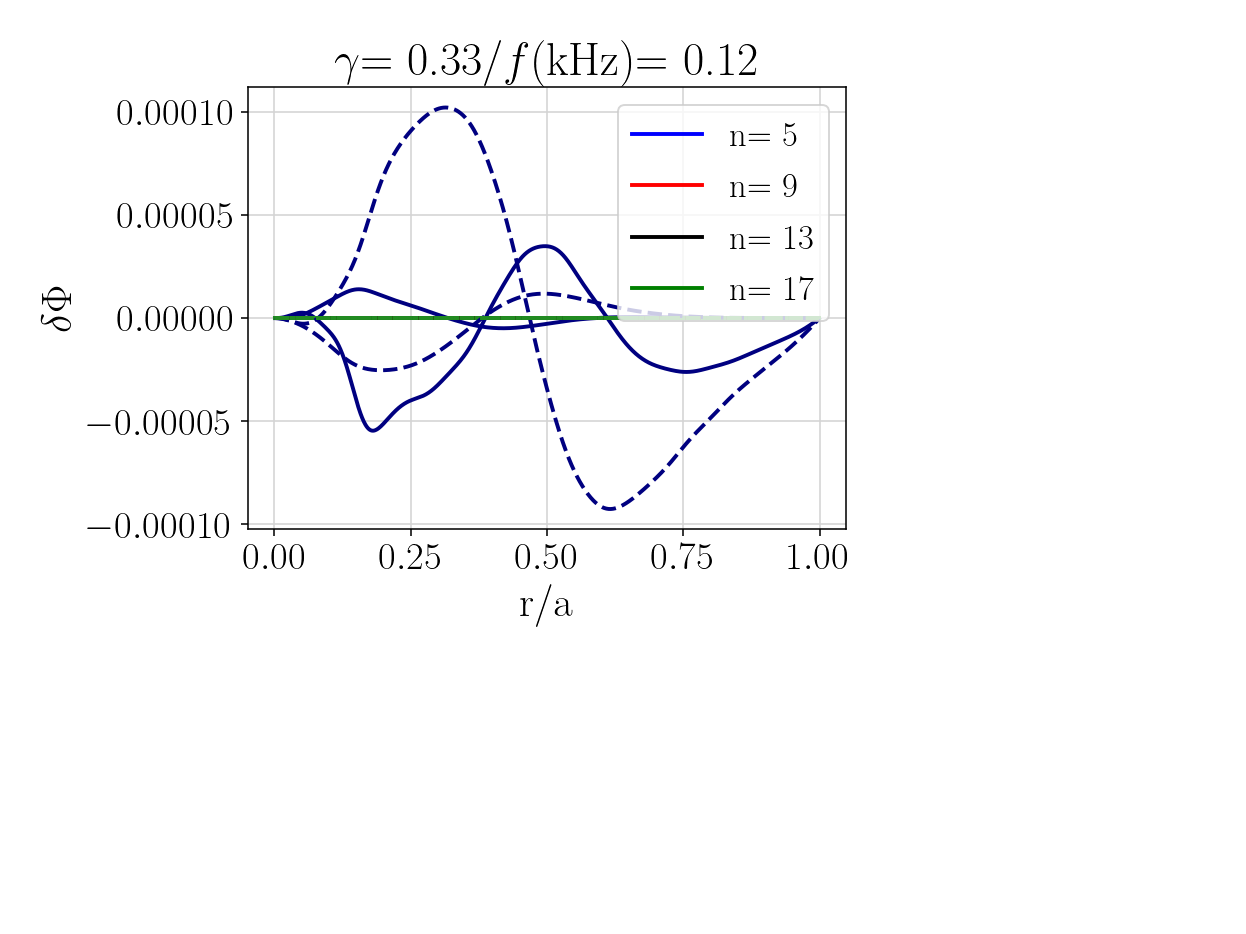

In [30]:
#def plot_func_eigensolver(df):
%matplotlib notebook

gr,f = round(gf[0],2), round(gf[1],2)

k=0
tor_coupl = [5,9,13,17]
for n in tor_coupl:
        d = get_colors_dict(n)
        plt.axhline(0,xmin = 0.05, xmax = 0.06,color=d["colfam"],linewidth=2,label=f"n= {n}")                   
        k += 1

for i in new_df.columns:
    j=0
    m = i.split("/")[0]
    
    d = get_colors_dict(abs(int(m)))
    cmap = mc.LinearSegmentedColormap.from_list("", d["colors"])
    
    if int(m) >= 0:
        plt.plot(df["r/a"],new_df[i],color=cmap(j/3))
    
    elif int(m) < 0:
        plt.plot(df["r/a"],new_df[i],"--",color=cmap(j/3))
    

plt.title(f"$\gamma$= {gr}/$f$(kHz)= {f}")
plt.xlabel("r/a")
plt.ylabel(r"$\delta \Phi$")
plt.rcParams['axes.labelsize'] = 22
plt.grid(True)
plt.legend(loc="upper right",prop={'size':18})
#plt.savefig(f"{sav_file}{round(energy)}_{beta}.png",dpi=350)
plt.show()